<a href="https://colab.research.google.com/github/Kushvanth015/Data_Science/blob/main/Spotify_Song_Mood_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎧Spotify Song Mood Analyzer using Mode Concept

#🛠️ Step 1: Requirements

In [1]:
pip install pandas matplotlib seaborn

#Step 2: import libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Step 3: Load dataset

In [11]:
df = pd.read_csv("/content/spotify_data.csv")

# Step 4: Convert mode to labels

In [12]:
df['mode_label'] = df['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')
df.head()

,track_id,track_name,artist,track_genre,popularity,danceability,energy,valence,mode,tempo,mode_label
0,track_0001,Song 1,Artist F,Electronic,47,0.72,0.31,0.75,1,159.00,Major
1,track_0002,Song 2,Artist A,Hip-Hop,7,0.49,0.93,0.65,0,88.03,Minor
2,track_0003,Song 3,Artist C,Classical,33,0.94,0.14,0.25,0,167.01,Minor
3,track_0004,Song 4,Artist E,Jazz,67,0.47,0.13,0.37,1,98.24,Major
4,track_0005,Song 5,Artist C,Classical,89,0.57,0.89,0.44,1,96.72,Major


# Step 5: Mood detection logic

In [13]:
def detect_mood(valence, energy):
    if valence > 0.5 and energy > 0.5:
        return 'Happy-Energetic'
    elif valence > 0.5:
        return 'Happy-Calm'
    elif energy > 0.5:
        return 'Sad-Energetic'
    else:
        return 'Sad-Calm'

df['mood'] = df.apply(lambda row: detect_mood(row['valence'], row['energy']), axis=1)

# 🎵 1. Count of Major vs Minor mode

/tmp/ipython-input-14-4201232918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mode_label', data=df, palette='coolwarm')


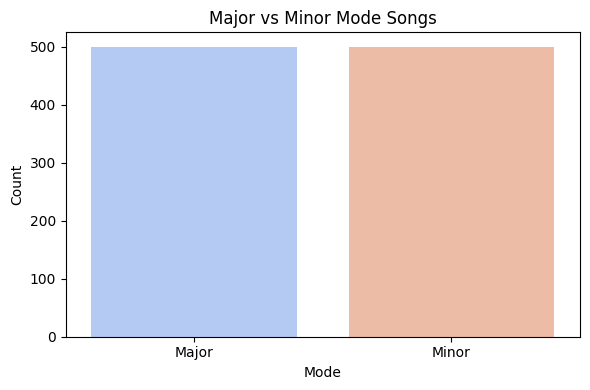

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='mode_label', data=df, palette='coolwarm')
plt.title("Major vs Minor Mode Songs")
plt.xlabel("Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 🎶 2. Tempo Distribution

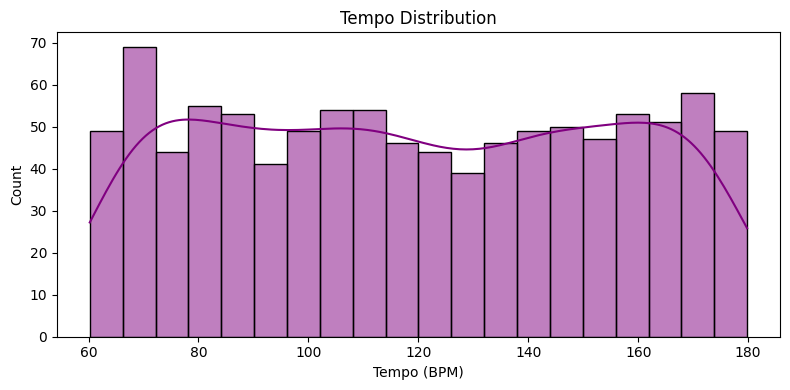

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(df['tempo'], bins=20, kde=True, color='purple')
plt.title("Tempo Distribution")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 😃 3. Mood Map

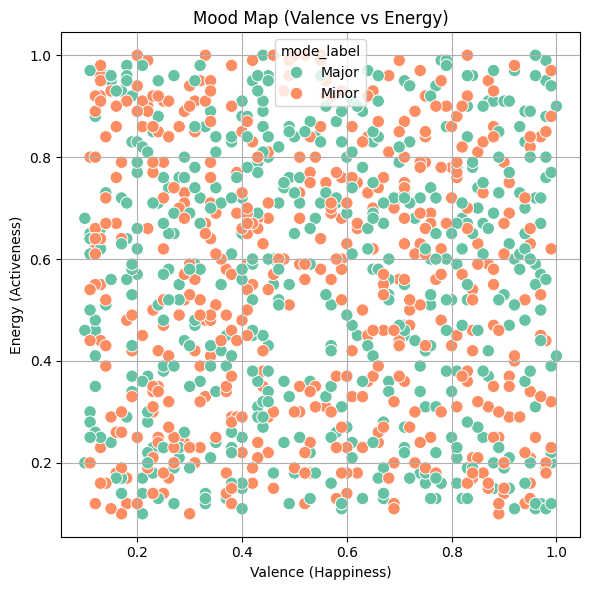

In [16]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="valence", y="energy", hue="mode_label", palette="Set2", s=80)
plt.title("Mood Map (Valence vs Energy)")
plt.xlabel("Valence (Happiness)")
plt.ylabel("Energy (Activeness)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 🎯 4. Input a track name and analyze

In [19]:
track_name = input("Enter a track name to analyze: ")
# Print the column names to verify the correct track name column
print(df.columns)
if track_name in df['track_name'].values:
    song = df[df['track_name'] == track_name].iloc[0]

Enter a track name to analyze: Song 3
Index(['track_id', 'track_name', 'artist', 'track_genre', 'popularity',
       'danceability', 'energy', 'valence', 'mode', 'tempo', 'mode_label',
       'mood'],
      dtype='object')


 # Show mood map again with this song highlighted


🎵 Track Analysis:
Track: Song 3
Artist: Artist C
Mode: Minor
Tempo: 167.01 BPM
Valence: 0.25
Energy: 0.14
Detected Mood: Sad-Calm


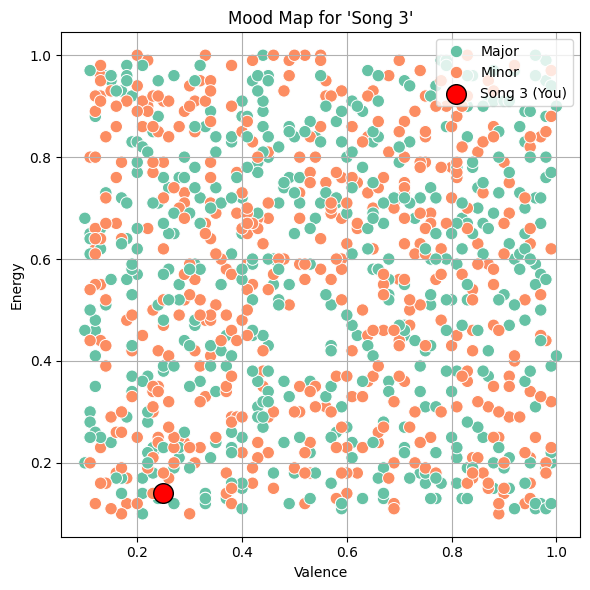

In [26]:
# Check if the entered track_name is in the 'track_name' column of the DataFrame
if track_name in df['track_name'].values:
    # If found, get the first row where the 'track_name' matches
    song = df[df['track_name'] == track_name].iloc[0]

    # Print the analysis of the found track
    print("\n🎵 Track Analysis:")
    print(f"Track: {song['track_name']}") # Use 'track_name' column
    print(f"Artist: {song['artist']}")
    print(f"Mode: {'Major' if song['mode'] == 1 else 'Minor'}")
    print(f"Tempo: {song['tempo']} BPM")
    print(f"Valence: {song['valence']}")
    print(f"Energy: {song['energy']}")
    print(f"Detected Mood: {song['mood']}")
else:
    # If not found, print a message
    print("❌ Track not found in the dataset.")

plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="valence", y="energy", hue="mode_label", palette="Set2", s=80)
plt.scatter(song['valence'], song['energy'], color='red', s=200, label=f"{track_name} (You)", edgecolor='black')
plt.title(f"Mood Map for '{track_name}'")
plt.xlabel("Valence")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()